In [2]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('Poverty_DB_test02.db')

# Load data from the "data_2022" table
data_2022 = pd.read_sql_query("SELECT * FROM data_2022", conn)

# Load data from the "API_Data" table
api_data = pd.read_sql_query("SELECT * FROM API_Data", conn)

# Close the database connection
conn.close()

In [4]:
# Display the structure of the data_2022 DataFrame
print("Data structure for data_2022:")
print(data_2022.info())

# Display the first few rows of the data_2022 DataFrame
print("\nFirst few rows of data_2022:")
print(data_2022.head())

# Display summary statistics of the data_2022 DataFrame
print("\nSummary statistics of data_2022:")
print(data_2022.describe())

# Similar operations for the api_data DataFrame
# Display the structure of the api_data DataFrame
print("Data structure for api_data:")
print(api_data.info())

# Display the first few rows of the api_data DataFrame
print("\nFirst few rows of api_data:")
print(api_data.head())

# Display summary statistics of the api_data DataFrame
print("\nSummary statistics of api_data:")
print(api_data.describe())

Data structure for data_2022:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            50 non-null     int64  
 1   state_id                      50 non-null     int64  
 2   year                          50 non-null     int64  
 3   18-24_count                   50 non-null     float64
 4   18-24<hs_grad                 50 non-null     float64
 5   18-24_hs_grad/equiv           50 non-null     float64
 6   18-24_some_college/associate  50 non-null     float64
 7   18-24_bachelor/higher         50 non-null     float64
 8   25+_count                     50 non-null     float64
 9   25+<9th_grade                 50 non-null     float64
 10  25+_9th-12th_grade_nongrad    50 non-null     float64
 11  25+_hs_grad/equiv             50 non-null     float64
 12  25+_some_college              50 non

In [5]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('Poverty_DB_test02.db')

# Define the SQL query to select data from the tables
sql_query = """
SELECT *
FROM data_2010
UNION ALL
SELECT *
FROM data_2011
UNION ALL
SELECT *
FROM data_2012
UNION ALL
SELECT *
FROM data_2013
UNION ALL
SELECT *
FROM data_2014
UNION ALL
SELECT *
FROM data_2015
UNION ALL
SELECT *
FROM data_2016
UNION ALL
SELECT *
FROM data_2017
UNION ALL
SELECT *
FROM data_2018
UNION ALL
SELECT *
FROM data_2019
UNION ALL
SELECT *
FROM data_2021
UNION ALL
SELECT *
FROM data_2022;
"""

# Execute the SQL query and read the results into a DataFrame
combined_df = pd.read_sql_query(sql_query, conn)

# Close the database connection
conn.close()

# Display the shape of the combined DataFrame
print("Shape of combined DataFrame:", combined_df.shape)


Shape of combined DataFrame: (600, 34)


In [6]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('Poverty_DB_test02.db')

# Load data from the data_2010 to data_2022 tables
dfs = []
for year in range(2010, 2023):
    table_name = f'data_{year}'
    # Check if the table exists in the database
    query = f"SELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}'"
    table_exists = conn.execute(query).fetchone()
    if table_exists:
        query = f'SELECT * FROM {table_name}'
        df = pd.read_sql_query(query, conn)
        dfs.append(df)

# Concatenate data from all available years into a single DataFrame
data = pd.concat(dfs, ignore_index=True)

# Close the database connection
conn.close()

# Display the first few rows of the data
print(data.head())
data

   id  state_id  year  18-24_count  18-24<hs_grad  18-24_hs_grad/equiv  \
0   1         1  2010     488349.0          0.199                0.301   
1   2         2  2010      75023.0          0.188                0.371   
2   3         3  2010     634568.0          0.196                0.307   
3   4         4  2010     291054.0          0.203                0.325   
4   5         5  2010    3944934.0          0.173                0.276   

   18-24_some_college/associate  18-24_bachelor/higher   25+_count  \
0                         0.439                  0.060   3161521.0   
1                         0.407                  0.034    450577.0   
2                         0.436                  0.060   4146758.0   
3                         0.415                  0.056   1919422.0   
4                         0.473                  0.078  24097200.0   

   25+<9th_grade  ...  45-64_bachelor/higher  65+_count  65+_hs_grad/higher  \
0          0.062  ...                  0.226   657974.0

,id,state_id,year,18-24_count,18-24<hs_grad,18-24_hs_grad/equiv,18-24_some_college/associate,18-24_bachelor/higher,25+_count,25+<9th_grade,...,45-64_bachelor/higher,65+_count,65+_hs_grad/higher,65+_bachelor/higher,25+_earnings,25+<hs_grad,25+_hs_grad/equiv.1,25+_some_college/associate,25+_bachelor's.1,25+>bachelor.1
0,1,1,2010,488349.0,0.199000,0.301000,0.439000,0.060000,3161521.0,0.062000,...,0.226000,657974.0,0.723000,0.167000,30406.0,17366.0,24849.0,30064.0,45502.0,52476.0
1,2,2,2010,75023.0,0.188000,0.371000,0.407000,0.034000,450577.0,0.028000,...,0.294000,53339.0,0.829000,0.244000,40575.0,20087.0,30617.0,40159.0,51137.0,67634.0
2,3,3,2010,634568.0,0.196000,0.307000,0.436000,0.060000,4146758.0,0.063000,...,0.274000,886795.0,0.837000,0.245000,32106.0,17638.0,25607.0,31751.0,46091.0,60051.0
3,4,4,2010,291054.0,0.203000,0.325000,0.415000,0.056000,1919422.0,0.063000,...,0.196000,420075.0,0.725000,0.152000,27498.0,18373.0,22895.0,27175.0,41102.0,54036.0
4,5,5,2010,3944934.0,0.173000,0.276000,0.473000,0.078000,24097200.0,0.105000,...,0.306000,4269495.0,0.766000,0.265000,35645.0,17937.0,27122.0,35735.0,52248.0,74423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,46,46,2022,842750.0,0.094708,0.362341,0.393712,0.149239,5978782.0,0.035103,...,0.418254,1462042.0,0.880347,0.358564,55607.0,30436.0,39730.0,45135.0,73893.0,96914.0
596,47,47,2022,671550.0,0.127276,0.363541,0.351129,0.158054,5470209.0,0.035110,...,0.375339,1309142.0,0.927973,0.354521,59430.0,36000.0,42288.0,51740.0,76376.0,100613.0
597,48,48,2022,161047.0,0.108987,0.418530,0.365906,0.106578,1262566.0,0.034309,...,0.231959,376162.0,0.860055,0.206993,42738.0,26692.0,35052.0,40791.0,52887.0,63974.0
598,49,49,2022,562259.0,0.105667,0.371621,0.376791,0.145922,4088500.0,0.024324,...,0.318832,1102386.0,0.927381,0.274235,50039.0,35193.0,40104.0,45726.0,61428.0,75811.0


In [7]:
file_path = 'combined.csv'


data.to_csv(file_path, index=False)

In [6]:
conn = sqlite3.connect('Poverty_DB_test02.db')
states_df = pd.read_sql_query("SELECT * FROM states", conn)
states_df

,id,state
0,1,Alabama
1,2,Alaska
2,3,Arizona
3,4,Arkansas
4,5,California
5,6,Colorado
6,7,Connecticut
7,8,Delaware
8,9,Florida
9,10,Georgia


In [7]:
# Select relevant features for clustering
features = ['median_h_income', 'poverty_rate', '18-24_bachelor/higher', '25+_bachelor/higher']

# Extract the selected features from the dataframe
X = data[features]

# Display the first few rows of the selected features
print(X.head())


KeyError: "['median_h_income', 'poverty_rate', '25+_bachelor/higher'] not in index"

In [8]:
# Merge the dataframes on the common column 'state_id'
merged_data = pd.merge(data, api_data, on='state_id')

# Select relevant features for clustering
features = ['median_h_income', 'poverty_rate', '25+_bachelor/higher']

# Extract the selected features from the merged dataframe
X = merged_data[features]

# Display the first few rows of the selected features
print(X.head())

KeyError: "['25+_bachelor/higher'] not in index"

In [9]:
print(merged_data.columns)

Index(['id_x', 'state_id', 'year_x', '18-24_count', '18-24<hs_grad',
       '18-24_hs_grad/equiv', '18-24_some_college/associate',
       '18-24_bachelor/higher', '25+_count', '25+<9th_grade',
       '25+_9th-12th_grade_nongrad', '25+_hs_grad/equiv', '25+_some_college',
       '25+_associate's', '25+_bachelor's', '25+>bachelor', '25-34_count',
       '25-34_hs_grad/higher', '25-34_bachelor/higher', '35-44_count',
       '35-44_hs_grad/higher', '35-44_bachelor/higher', '45-64_count',
       '45-64_hs_grad/higher', '45-64_bachelor/higher', '65+_count',
       '65+_hs_grad/higher', '65+_bachelor/higher', '25+_earnings',
       '25+<hs_grad', '25+_hs_grad/equiv.1', '25+_some_college/associate',
       '25+_bachelor's.1', '25+>bachelor.1', 'id_y', 'median_h_income',
       'poverty_rate', 'poverty_count', 'year_y'],
      dtype='object')


In [10]:
# Adjust feature selection based on column names
features = ['median_h_income', 'poverty_rate', "25+_bachelor's"]

# Extract the selected features from the merged dataframe
X = merged_data[features]

# Display the first few rows of the selected features
print(X.head())

   median_h_income  poverty_rate  25+_bachelor's
0            40538         0.189           0.139
1            41427         0.191           0.139
2            41610         0.190           0.139
3            42882         0.189           0.139
4            42917         0.192           0.139


In [11]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters
n_clusters = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataframe
merged_data['cluster'] = cluster_labels

# Display the cluster labels
print(merged_data[['state', 'cluster']].head())


c:\Users\trist\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: "['state'] not in index"

In [12]:
# Merge the 'states_df' dataframe to get the state names
merged_data_with_states = pd.merge(merged_data, states_df, left_on='state_id', right_on='id')

# Display the cluster labels with state names
print(merged_data_with_states[['state', 'cluster']].head())

     state  cluster
0  Alabama        0
1  Alabama        0
2  Alabama        0
3  Alabama        0
4  Alabama        0


In [13]:
# Check the distribution of features
print(merged_data_with_states[features].describe())

# Check the distribution of cluster assignments
print(merged_data_with_states['cluster'].value_counts())


       median_h_income  poverty_rate  25+_bachelor's
count      7200.000000   7200.000000     7200.000000
mean      58534.156667      0.137768        0.190417
std       12023.254498      0.031452        0.030440
min       36963.000000      0.074000        0.109000
25%       49203.000000      0.112000        0.169959
50%       56804.000000      0.133000        0.192000
75%       66355.750000      0.160000        0.211942
max       96341.000000      0.239000        0.288416
cluster
2    3052
1    2186
0    1962
Name: count, dtype: int64


In [14]:
# Update the number of clusters
n_clusters = 4  # Or any other number you want to try

# Re-run KMeans clustering with the updated number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Update the 'cluster' column in the dataframe
merged_data_with_states['cluster'] = cluster_labels

# Check the distribution of cluster assignments with the new number of clusters
print(merged_data_with_states['cluster'].value_counts())


c:\Users\trist\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
2    1928
1    1808
0    1765
3    1699
Name: count, dtype: int64


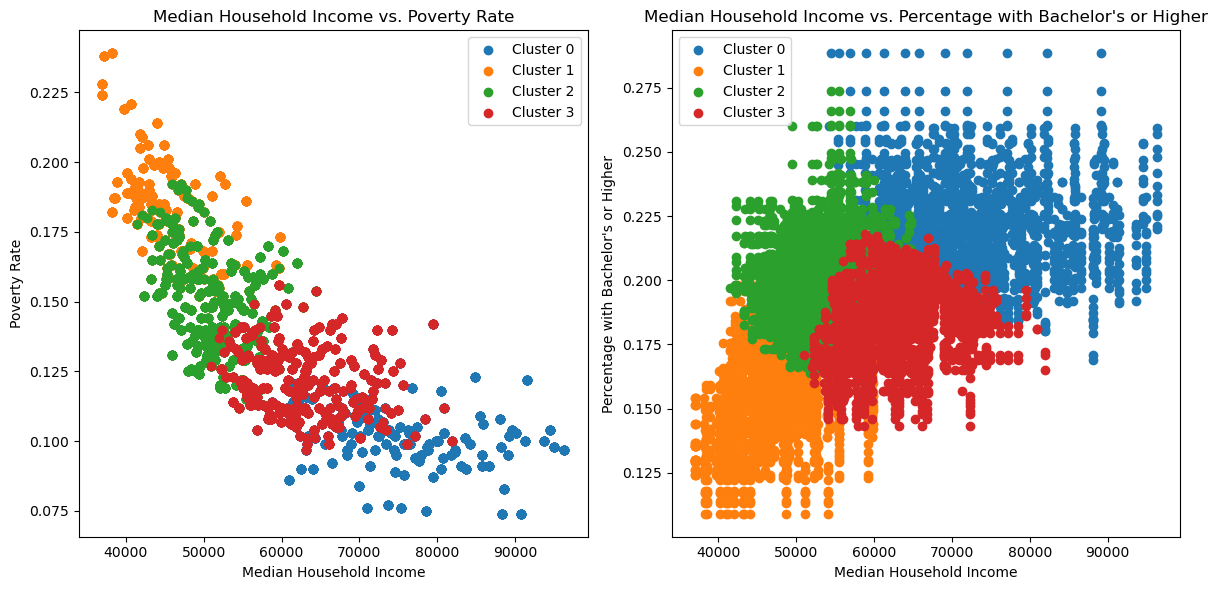

In [15]:
import matplotlib.pyplot as plt

# Plot scatter plots of the features with different colors representing the clusters
plt.figure(figsize=(12, 6))

# Scatter plot for median household income vs. poverty rate
plt.subplot(1, 2, 1)
for cluster in range(n_clusters):
    cluster_data = merged_data_with_states[merged_data_with_states['cluster'] == cluster]
    plt.scatter(cluster_data['median_h_income'], cluster_data['poverty_rate'], label=f'Cluster {cluster}')
plt.xlabel('Median Household Income')
plt.ylabel('Poverty Rate')
plt.title('Median Household Income vs. Poverty Rate')
plt.legend()

# Scatter plot for median household income vs. percentage of population with bachelor's degree or higher
plt.subplot(1, 2, 2)
for cluster in range(n_clusters):
    cluster_data = merged_data_with_states[merged_data_with_states['cluster'] == cluster]
    plt.scatter(cluster_data['median_h_income'], cluster_data["25+_bachelor's"], label=f'Cluster {cluster}')
plt.xlabel('Median Household Income')
plt.ylabel("Percentage with Bachelor's or Higher")
plt.title('Median Household Income vs. Percentage with Bachelor\'s or Higher')
plt.legend()

plt.tight_layout()
plt.show()


Silhouette Plot: Plot silhouette scores for each sample to evaluate the quality of the clustering. Silhouette scores range from -1 to 1, where a score closer to 1 indicates better cluster separation.

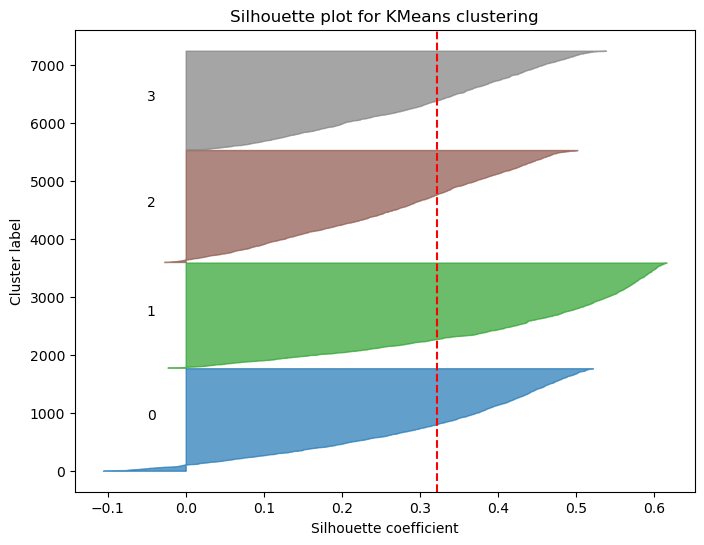

Overall silhouette score: 0.3212798363385846


In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

# Compute the overall silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

# Plot silhouette plot
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size
    color = plt.cm.tab10(i / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for KMeans clustering")
plt.show()

# Print the overall silhouette score
print(f"Overall silhouette score: {silhouette_avg}")


In [22]:
import pandas as pd

# Define the latitude, longitude, and state name data
# Copy/pasted from "https://developers.google.com/public-data/docs/canonical/states_csv"
latlong = {
    'state': ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
    'latitude': [63.588753, 32.318231, 35.20105, 34.048928, 36.778261, 39.550051, 41.603221, 38.905985, 38.910832, 27.664827, 32.157435, 19.898682, 41.878003, 44.068202, 40.633125, 40.551217, 39.011902, 37.839333, 31.244823, 42.407211, 39.045755, 45.253783, 44.314844, 46.729553, 37.964253, 32.354668, 46.879682, 35.759573, 47.551493, 41.492537, 43.193852, 40.058324, 34.97273, 38.80261, 43.299428, 40.417287, 35.007752, 43.804133, 41.203322, 18.220833, 41.580095, 33.836081, 43.969515, 35.517491, 31.968599, 39.32098, 37.431573, 44.558803, 47.751074, 43.78444, 38.597626, 43.075968],
    'longitude': [-154.493062, -86.902298, -91.831833, -111.093731, -119.417932, -105.782067, -73.087749, -77.033418, -75.52767, -81.515754, -82.907123, -155.665857, -93.097702, -114.742041, -89.398528, -85.602364, -98.484246, -84.270018, -92.145024, -71.382437, -76.641271, -69.445469, -85.602364, -94.6859, -91.831833, -89.398528, -110.362566, -79.0193, -101.002012, -99.901813, -71.572395, -74.405661, -105.032363, -116.419389, -74.217933, -82.907123, -97.092877, -120.554201, -77.194525, -66.590149, -71.477429, -81.163725, -99.901813, -86.580447, -99.901813, -111.093731, -78.656894, -72.577841, -120.740139, -88.787868, -80.454903, -107.290284],
    'name': ['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming']
}

# Create DataFrame from the data
latlong_data = pd.DataFrame(latlong)

# Display the DataFrame
latlong_data


,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California
5,CO,39.550051,-105.782067,Colorado
6,CT,41.603221,-73.087749,Connecticut
7,DC,38.905985,-77.033418,District of Columbia
8,DE,38.910832,-75.527670,Delaware
9,FL,27.664827,-81.515754,Florida
